In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [18]:
# Load the dataset
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:

train_data, test_data, train_targets, test_targets = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
train_data = scaler.fit_transform(train_data)
train_data

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [21]:
test_data = scaler.transform(test_data)
test_data

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [22]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_data.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) 
])


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['mae']) 


In [24]:
history = model.fit(train_data, train_targets, epochs=20, 
                    validation_split=0.2)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5361 - mae: 0.8528 - val_loss: 0.4648 - val_mae: 0.4808
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4351 - mae: 0.4701 - val_loss: 0.4104 - val_mae: 0.4412
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3627 - mae: 0.4261 - val_loss: 0.3897 - val_mae: 0.4422
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3640 - mae: 0.4285 - val_loss: 0.3809 - val_mae: 0.4459
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3511 - mae: 0.4175 - val_loss: 0.3659 - val_mae: 0.4227
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3335 - mae: 0.4039 - val_loss: 0.3537 - val_mae: 0.4082
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3300 - mae: 0.4018 - val_loss: 0.3470 - val_mae: 0.4067
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3688 - mae: 0.4102 - val_loss: 0.3473 - val_mae: 0.3956
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [25]:
test_loss, test_mae = model.evaluate(test_data, test_targets, verbose=2)
print('\nTest MAE:', test_mae)


129/129 - 0s - 1ms/step - loss: 0.2967 - mae: 0.3737

Test MAE: 0.37371769547462463


In [26]:
predictions = model.predict(test_data)

print('First prediction:', predictions[0])
print('Actual target:', test_targets[0])


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
First prediction: [0.45394814]
Actual target: 0.477


<function matplotlib.pyplot.show(close=None, block=None)>

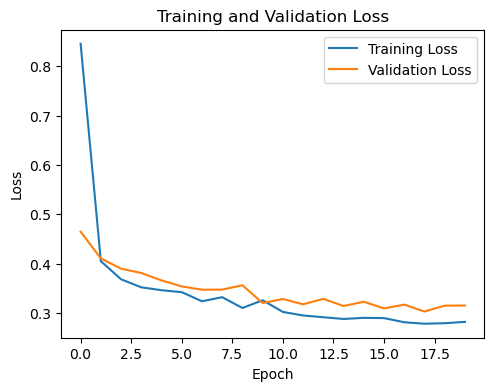

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show

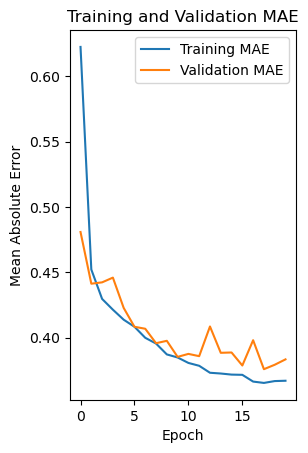

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.title('Training and Validation MAE')
plt.show()